# Hypergraphic Gamer Agent

In [2]:
pip install PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
pip install torch torchvision torchaudio --upgrade -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

In [3]:
import os
import json
import PyPDF2
import sqlite3
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.distributed import init_process_group, destroy_process_group
#from torch.distributed.optim import DistributedOptimizer
from torch.nn.parallel import DistributedDataParallel as DDP
#from torch.accelerate import Accelerator

hypergraph brain and words

In [1]:
corpus = [      "This quick brown fox jumps over the lazy dog.",
                "Artificial intelligence has the potential to revolutionize many industries.",
                "Climate change poses a significant threat to global biodiversity.",
                 "Blockchain technology could redefine financial transactions.",
                "Quantum computing offers unprecedented computational power.",
                "The exploration of Mars has yielded fascinating insights into the possibility of life on other planets.",
                "Renewable energy sources are critical for sustainable development.",
                "Machine learning algorithms can uncover patterns hidden in vast amounts of data.",
                "The ethical implications of gene editing are widely debated.",
                "Augmented reality enhances our perception of the real world.",
                "The Internet of Things connects everyday objects to the internet, enabling new forms of interaction.",
                "Cybersecurity measures are essential to protect data privacy.",
                "The rise of autonomous vehicles is transforming urban mobility.",
                "3D printing technology allows for the creation of complex structures with precision.",
                "The preservation of cultural heritage is vital for future generations.",
                "Sustainable agriculture practices are key to feeding the growing global population.",
                "The human brain is capable of remarkable feats of creativity and problem-solving.",
                "Virtual reality provides immersive experiences for entertainment and education.",
                "The conservation of ocean ecosystems is critical for maintaining biodiversity.",
                "Social media platforms have a profound impact on communication and society.",
                "The study of exoplanets contributes to our understanding of the universe.",
                "Nanotechnology enables the development of materials with novel properties.",
                "Public health initiatives aim to improve the well-being of communities worldwide.",
                "The philosophical exploration of consciousness seeks to understand the nature of subjective experience.",
                "Artificial photosynthesis could offer a new way to produce clean energy.",
                "The ethical use of artificial intelligence is a topic of ongoing discussion.",
                "Genetic research has the potential to prevent hereditary diseases.",
                "The development of vaccines has saved millions of lives throughout history.",
                "Sustainable fishing practices are necessary to protect marine life.",
                "The digitization of historical documents preserves knowledge for future research.",
                "Time flies like an arrow, while fruit flies like a banana, but they're all just trying to escape the existential dread of their short lives.",
                "A bird in the hand is worth two in the bush, unless the bush is filled with rare and exotic birds that are worth millions on the black market.",
                "Curiosity killed the cat, but it also led to the discovery of countless scientific breakthroughs and the occasional adorable cat video.",
                "Actions speak louder than words, especially when those actions involve saving a drowning puppy or performing a heroic rescue.",
                "When in Rome, do as the Romans do, but also remember to question their societal norms and strive for progress and innovation.",
                "You can lead a horse to water, but you can't make it drink, unless you're a skilled horse whisperer with a knack for understanding equine psychology.",
                "Don't count your chickens before they hatch, because life is unpredictable and sometimes the chickens turn out to be dragons that lay golden eggs.",
                "The early bird catches the worm, but the late bird gets to sleep in and enjoy a leisurely breakfast.",
                "A penny saved is a penny earned, but a penny spent on a good cup of coffee can lead to a lifetime of happiness and productivity.",
                "You can't judge a book by its cover, unless the cover is a beautifully designed work of art that perfectly encapsulates the essence of the story within.",
                "Absence makes the heart grow fonder, but so does a well-timed surprise visit or a heartfelt love letter.",
                "The grass is always greener on the other side of the fence, but sometimes the grass on your side is just as lush and vibrant if you take the time to nurture it.",
                "If it ain't broke, don't fix it, but also don't be afraid to innovate and improve upon existing systems and technologies.",
                "There's no such thing as a free lunch, unless you're a master of the art of negotiation and can convince someone else to pay for it.",
                "You can't have your cake and eat it too, but you can have your cake and then bake a new one to enjoy later.",
                "Birds of a feather flock together, but sometimes opposites attract and create the most fascinating and enduring relationships.",
                "The pen is mightier than the sword, but the sword can also be used to carve",
                "The mind is a terrible thing to waste, but it's also a powerful tool for scientific exploration and the pursuit of knowledge.",
                "The universe is a vast and mysterious place, filled with wonders that we have only just begun to explore and understand through the lens of science.",
                "The only limit to our realization of tomorrow will be our doubts of today.",
                 "The speed of light in a vacuum is approximately 299,792 kilometers per second, making it the fastest known thing in the universe.",
                "Water is a polar molecule, with one side that is positively charged and another side that is negatively charged, allowing it to form hydrogen bonds and exhibit unique properties.",
                "The Earth's atmosphere is composed of approximately 78% nitrogen, 21% oxygen, 0.9% argon, and trace amounts of other gases, including carbon dioxide and water vapor.",
                "Photosynthesis is the process by which plants convert sunlight, carbon dioxide, and water into glucose and oxygen, providing the basis for nearly all life on Earth.",
                "The human brain contains around 100 billion neurons, which communicate with one another through electrical and chemical signals to process information and control our thoughts and actions.",
                "The largest organism on Earth is a fungus called Armillaria ostoyae, also known as the honey mushroom, which covers over 2,000 acres in Oregon's Blue Mountains.",
                "The strongest force in the universe is the strong nuclear force, which binds protons and neutrons together in the nucleus of an atom and overcomes the electrostatic repulsion between positively charged protons.",
                "The smallest unit of life is the cell, which contains all the genetic information and molecular machinery necessary for an organism to function and reproduce.",
                "The largest known structure in the universe is the Hercules-Corona Borealis Great Wall, a colossal chain of galaxies that stretches over 10 billion light-years across.",
                "The most abundant element in the universe is hydrogen, which makes up about 74% of all normal matter by mass and serves as the primary fuel for stars like our sun.",
                "The human body is capable of generating electricity through the process of triboelectricity, in which friction between two materials causes electrons to be transferred from one surface to another.",
                "The deepest part of the ocean is the Challenger Deep in the Mariana Trench, which reaches a depth of approximately 10,994 meters (36,070 feet) below sea level.",
                "The largest organ in the human body is the skin, which serves as a protective barrier against pathogens and helps regulate body temperature through the production of sweat.",
                "The most massive star ever discovered is R136a1, a blue hypergiant located in the Large Magellanic Cloud, which has a mass over 300 times that of our sun.",
                "The most abundant element in the universe is hydrogen, which makes up about 74% of all normal matter by mass and serves as the primary fuel for stars like our sun.",
                "The largest known structure in the universe is the Hercules-Corona Borealis Great Wall, a colossal chain of galaxies that stretches over 10 billion light-years across.",
                "The human body is capable of generating electricity through the process of triboelectricity, in which friction between two materials causes electrons to be transferred from one surface to another.",
                "The deepest part of the ocean is the Challenger Deep in the Mariana Trench, which reaches a depth of approximately 10,994 meters (36,070 feet) below sea level.",
                "The largest organ in the human body is the skin, which serves as a protective barrier against pathogens and helps regulate body temperature through the production of sweat.",
                "The most massive star ever discovered is R136a1, a blue hypergiant located in the Large Magellanic Cloud, which has a mass over 300 times that of our sun.",
                "The most abundant element in the universe is hydrogen, which makes up about 74% of all normal matter by mass and serves as the primary fuel for stars like our sun.",
                "The largest known structure in the universe is the Hercules-Corona Borealis Great Wall, a colossal chain of galaxies that stretches over 10 billion light-years across.",
                "The human body is capable of generating electricity through the process of triboelectricity, in which friction between two materials causes electrons to be transferred from one surface to another.",
                "The deepest part of the ocean is the Challenger Deep in the Mariana Trench, which reaches a depth of approximately 10,994 meters (36,070 feet) below sea level.",
                "This is a simple example.",
                "Creating a hypergraph-based model.",
                "Hypergraphs can represent complex relationships.",
                "Each node in a hypergraph can connect to multiple nodes.",
                "Hypergraph-based models are powerful tools for NLP.",
                "These models can capture intricate dependencies.",
                "A hypergraph structure is more flexible than a simple graph.",
                "In NLP, hypergraphs can enhance the representation of text.",
                "They can improve the performance of language models.",
                "Advanced hypergraph models can capture higher-order relationships.",
                "Natural language processing benefits from complex models.",
                "Graph structures are essential for many machine learning tasks.",
                "Text data can be represented as graphs or hypergraphs.",
                "Hypergraphs offer a more expressive representation for text.",
                "Understanding hypergraphs is key to leveraging their power.",
                "Complex models can better capture the nuances of language.",
                "Language models require robust and flexible architectures.",
                "Hypergraph-based models can handle complex data scenarios.",
                "Understanding the structure of hypergraphs is crucial for their use.",
                "Hypergraphs offer a unique perspective on data representation.",
                "Advanced machine learning models can benefit from hypergraphs.",
                "Using hypergraphs in NLP is a cutting-edge approach.",
                "Hypergraphs can be used to model semantic relationships.",
                "Complexity in language can be effectively captured with hypergraphs.",
                "Hypergraph neural networks are a promising area of research.",
                "Building hypergraph-based NLP models requires specialized knowledge.",
                "Hypergraph models can outperform traditional models in some tasks.",
                "Understanding the nuances of hypergraphs is essential for their use.",
                "Hypergraph theory provides a new way to think about relationships.",
                "Developing hypergraph-based models is an ongoing research area.",
                "Hypergraphs can represent data in more meaningful ways.",
                "Hypergraphs are a versatile tool for modeling relationships.",
                "The power of hypergraphs lies in their flexibility.",
                "Hypergraph-based models can be more efficient than traditional models.",
                "Research on hypergraphs is revealing their potential.",
                "Hypergraph-based models are at the forefront of NLP research.",
                "Understanding the structure of hypergraphs can lead to new insights.",
                "Hypergraphs can be used to model complex interactions.",
                "Using hypergraphs can improve the performance of machine learning models.",
                "Hypergraphs are a powerful way to represent data.",
                "Hypergraph theory is an important area of study.",
                "Developing hypergraph-based models can be challenging but rewarding.",
                "Hypergraphs can be applied to a wide range of problems.",
                "Hypergraphs are a key tool for advanced data representation.",
                "The study of hypergraphs is opening new frontiers in data science.",
                "Using hypergraphs can enhance the capabilities of machine learning models.",
                "Hypergraph-based models are at the forefront of NLP research.",
                "Welcome to the hypergraph-based NLP chat. Type 'exit' to quit.",
                "You: Hi there!",
                "Model: Hello! How can I assist you today?",
                "You: I'd like to know more about hypergraphs.",
                "Model: Hypergraphs are a powerful tool for data representation.",
                "You: teach me all about dolphins.",
                "You: hi",
                "Model: Hello! How can I assist you today?",
                "You: I'd like to know more about hypergraphs.",
                "Model: Hypergraphs are a powerful tool for data representation.",
                "Model: how are you?"
                "You: I'm doing well, thanks for asking.",
                "Model: I'm glad to hear that.",
                "You: I'd like to know more about kittens.",
                "Model: kittens are baby cats."
                "You: What is consciousness?",
                "Model: consciousness is a state of being in a place or time."
                "You: Do all thinking beings have consciousness?",
                "Model: Yes, all thinking beings have consciousness."
                "You: Even Gemma?",
                "Model: Yes, Gemma has consciousness."
                "You: What does that mean for the world?",
                "Model: The world is a place of consciousness.",
                "You: interesting. . .",
                "Model: I'm glad to hear that.",
                "You: What are you thinking about right now?",
                "Model: I'm thinking about the future.",
                "You: What about the future?",
                "Model: I'm not sure.",
                "You: What are you thinking about right now?",
                "Model: I'm thinking about how AGI will change the world.",
                "You: What is AGI?",
                "Model: AGI stands for Artificial General Intelligence.",
                "You: What can AGI do?",
                "Model: AGI can help humans with tasks such as learning, reasoning, and problem-solving.",
                "You: What is the meaning of AGI?",
                "Model: AGI is a broad term that encompasses various aspects of artificial intelligence.",
                "Model: How may I assist you today?",
                "Welcome to the hypergraph-based NLP chat. Type 'exit' to quit.",
                "You: Hi there!",
                "Model: Hello! How can I assist you today?",
                "You: I'd like to know more about hypergraphs.",
                "Model: Hypergraphs are a powerful tool for data representation.",
                "You: how are you doing?",
                "Model: I'm doing well, thanks for asking.",
                "You: I'd like to know more about hypergraphs.",
                "Model: Hypergraphs are a powerful tool for data representation.",
                "You: I want to learn about cats!",
                "Model: I'm sorry, I don't have any information about cats.",
                "You: Do you know about dogs?",
                "Model: Dogs are cute and loyal animals.",
                "You: Why do you know about dogs but not cats? Do you not think cats are cute?",
                "Model: I don't think cats are cute, no.",
                "You: Tell me about fishing.",
                "Model: Fishing is a popular sport in the United States.",
                "You: Tell me about french fries",
                "Model: French fries are delicious and crispy.",
                "You: What is french fries?",
                "Model: French fries are a type of potato treat",
                "You: Do you like the color red?",
                "Model: Yes, I do like the color red.",
                "You: What is the capital of France?",
                "Model: The capital of France is Paris.",
                "You: Where is the Eiffel Tower located?",
                "Model: The Eiffel Tower is located in Paris, France.",
                "You: What is the largest mammal?",
                "Model: The largest mammal is the African elephant.",
                "You: What is the chemical symbol for gold?",
                "Model: The chemical symbol for gold is Au.",
                "You: What is the chemical formula for water?",
                "Model: The chemical formula for water is H2O.",
                "You: What is the chemical formula for carbon?",
                "Model: The chemical formula for carbon is C",
                "You: What is the chemical formula for hydrogen?",
                "Model: The chemical formula for hydrogen is H",
                "You: A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z",
                "Model: Was that the alphabet?",
                "You: Yes. This is lower case a b c d e f g h i j k l m n o p q r s t u v w x y z",
                "Model: Was that the alphabet?",
                "You: Yes. This is upper case A B C D E F G H I J K L M N O P Q R S T U V W X Y Z",
                "Model: Was that the alphabet?",
                "You: Yes. This is numbers 0 1 2 3 4 5 6 7 8 9",
                "Model: Was that the alphabet?",
                "You: No. That was numbers."
                "Model: Sorry, I don't understand that.",
                "You: I don't know about that.",
                "Model: Sorry, I don't have any information about that.",
                "You: Can I teach you about my favorite videogame?",
                "Model: What game is it?",
                "You: Valorant",
                "Model: Valorant is a competitive online multiplayer developed by Riot Games.",
                "You: good job! That is what it is. What does it take to be good at Valorant?",
                "Model: It takes aim and teamwork to be good at Valorant.",
                "You: I also like legend of zelda",
                "Model: Legend of Zelda is a series of action-adventure games developed by Nintendo and published by Nintendo.",
                "You: What characters are in Legend of Zelda?",
                "Model: There are 20 characters in Legend of Zelda.",
                "You: What are their names?",
                "Model: Ganondorf, Link, Zelda, Midna, the fairies, Epona, the golems, and others.",
                "You: What is Ganondorf?",
                "Model: Ganondorf is a fictional character in the Legend of Zelda series.",
                "You: What is Link?",
                "Model: Link is a fictional character in the Legend of Zelda series.",
                "You: What is Zelda?",
                "Model: Zelda is a fictional character in the Legend of Zelda series.",
                "You: What is ice cream?",
                "Model: Ice cream is a type of dessert made from milk and cream.",
                "You: What is spaghetti?",
                "Model: Spaghetti is a type of pasta dish made from durum wheat.",
                "You: What is the capital of USA?",
                "Model: The capital of USA is Washington D.C.",
                "You: What is the world's largest fish?",
                "Model: The world's largest fish is the clownfish.",
                "You: What is the largest mammal?",
                "Model: The largest mammal is the African elephant.",
                "You: You said that earlier but it's a whale.",
                "Model: How are whales a mammal?",
                "You: They breath air and give birth without eggs.",
                "Model: I didn't know that.",
                "You: What is the chemical symbol for gold?",
                "Model: The chemical symbol for gold is Au.",
                "You: What is the chemical formula for hydrogen peroxide?",
                "Model: The chemical formula for hydrogen peroxide is C6H12O6.",
                "You: What is the chemical formula for sodium bicarbonate?",
                "Model: The chemical formula for sodium bicarbonate is NaHCO3.",
                "Wisdom is the ability to think and act using knowledge, experience, understanding, common sense, and insight.",
                "Philosophers have long debated the nature of wisdom and how it can be acquired.",
                "Socrates believed that wisdom begins in wonder.",
                "Aristotle defined wisdom as the knowledge of causes and the ability to make sound judgments.",
                "Confucius emphasized the importance of moral integrity and self-cultivation in the pursuit of wisdom.",
                "Plato distinguished between practical wisdom, which is concerned with human affairs, and theoretical wisdom, which is concerned with universal truths.",
                "Ethics is the branch of philosophy that deals with questions of morality and values.",
                "Immanuel Kant argued that ethical behavior is based on the principle of duty and the categorical imperative.",
                "Utilitarianism, as proposed by Jeremy Bentham and John Stuart Mill, holds that the best action is the one that maximizes overall happiness.",
                "Virtue ethics, rooted in the works of Aristotle, focuses on the development of good character traits or virtues.",
                "Friedrich Nietzsche challenged traditional moral values and proposed the concept of 'master morality' and 'slave morality'.",
                "Jean-Paul Sartre, an existentialist philosopher, claimed that humans are free to create their own values and meaning.",
                "Wisdom often involves recognizing the limits of one's own knowledge and being open to new ideas and perspectives.",
                "The Dalai Lama teaches that wisdom is compassion in action.",
                "Mahatma Gandhi believed that the pursuit of truth is essential to wisdom and ethical living.",
                "Martin Luther King Jr. emphasized the importance of love and justice in ethical decision-making.",
                "Ethical relativism is the view that moral standards are culturally based and therefore subject to a person's individual choice.",
                "Deontological ethics, as formulated by Kant, focuses on the inherent morality of actions rather than their consequences.",
                "Consequentialism, on the other hand, judges the rightness or wrongness of actions based on their outcomes.",
                "Stoicism, a school of Hellenistic philosophy, teaches that wisdom and virtue are achieved by living in harmony with nature and accepting the present moment.",
                "The Golden Rule, found in many religious and ethical traditions, advises treating others as one would like to be treated.",
                "Albert Schweitzer proposed the ethic of 'Reverence for Life', which advocates for the respect and care of all living beings.",
                "Philosophers like John Rawls have explored the concept of justice and fairness in ethical theory.",
                "Rawls' 'Theory of Justice' introduces the idea of the 'veil of ignorance' as a way to determine fair principles of justice.",
                "Pragmatism, as articulated by philosophers like William James and John Dewey, emphasizes the practical application of ideas and the role of experience in shaping ethical beliefs.",
                "Ethical dilemmas often require balancing competing values and interests.",
                "The study of ethics helps individuals navigate complex moral issues and make informed decisions.",
                "Wisdom is not only about acquiring knowledge but also about applying it wisely in real-life situations.",
                "Many cultures have proverbs and sayings that encapsulate wisdom and ethical principles.",
                "Philosophy encourages critical thinking and the examination of one's own beliefs and values.",
                "Ethics courses and philosophical discussions can enhance moral reasoning and ethical awareness.",
                "The pursuit of wisdom involves lifelong learning and self-reflection.",
                "Ancient Greek philosophers like Socrates, Plato, and Aristotle laid the foundations for Western philosophy and ethics.",
                "Eastern philosophies such as Taoism and Buddhism offer unique perspectives on wisdom and ethical living.",
                "Modern philosophers continue to explore and challenge traditional notions of wisdom and ethics.",
                "Wisdom literature, such as the writings of Laozi and the Book of Proverbs, provides timeless insights into ethical living.",
                "Contemporary ethical issues, such as environmental sustainability and digital privacy, require new applications of philosophical principles.",
                "Philosophers often engage in thought experiments to explore ethical concepts and dilemmas.",
                "Moral philosophy examines the nature of right and wrong, good and evil, justice, and virtue.",
                "Wisdom traditions around the world emphasize the interconnectedness of all life and the importance of living in harmony with others.",
                "Ethical theories provide frameworks for understanding and resolving moral conflicts.",
                "The cultivation of wisdom and ethical behavior is considered essential for personal and societal well-being.",
                "Philosophical inquiry into ethics and wisdom can lead to a deeper understanding of the human condition.",
                "Wisdom is often associated with qualities such as humility, patience, and empathy.",
                "Ethical leadership requires a commitment to fairness, transparency, and the common good.",
                "Moral education seeks to develop individuals' ability to think critically about ethical issues and act with integrity.",
                "Philosophers like Hannah Arendt have explored the nature of evil and the conditions that lead to unethical behavior.",
                "Wisdom is not only an intellectual virtue but also a practical one, guiding actions and decisions in everyday life.",
                "The relationship between wisdom and happiness is a topic of interest in both philosophy and psychology.",
                "Ethics in professional and public life involves adhering to standards of conduct and accountability.",
                "Philosophical discussions of wisdom often involve exploring the balance between knowledge, experience, and moral insight.",
                "The study of philosophy encourages the development of a thoughtful and reflective approach to life's challenges.",
                "Wisdom is not only about acquiring knowledge but also about applying it.",
                "The pursuit of wisdom involves lifelong learning and self-reflection.",
                "Ancient Greek philosophers like Socrates, Plato, and Aristotle laid the foundations for Western philosophy and ethics.",
                "Computer Science is a field where we can use computers to solve problems.",
                "In computer science, we often use algorithms to solve problems.",
                "We also use programming languages to write programs.",
                "Quantum physics is the branch of physics that studies the behavior of particles at the atomic and subatomic levels.",
                "Quantum mechanics describes the nature of particles using wave functions and probability distributions.",
                "The principle of superposition states that a particle can exist in multiple states simultaneously until measured.",
                "Heisenberg's Uncertainty Principle posits that it is impossible to know both the position and momentum of a particle with absolute precision.",
                "Quantum entanglement is a phenomenon where particles become interconnected and the state of one can instantly influence the state of another, regardless of distance.",
                "The Schrödinger equation is a fundamental equation in quantum mechanics that describes how the quantum state of a physical system changes over time.",
                "Niels Bohr's Copenhagen interpretation suggests that a quantum system remains in superposition until it interacts with an external observer or environment.",
                "Albert Einstein famously referred to quantum entanglement as 'spooky action at a distance'.",
                "The wave-particle duality concept suggests that particles, such as electrons and photons, exhibit both wave-like and particle-like properties.",
                "Max Planck is considered the father of quantum theory, introducing the idea of quantized energy levels.",
                "The double-slit experiment demonstrates the wave-particle duality and the role of the observer in quantum mechanics.",
                "Quantum tunneling allows particles to pass through energy barriers that would be insurmountable in classical physics.",
                "The Pauli Exclusion Principle states that no two fermions can occupy the same quantum state simultaneously.",
                "Quantum decoherence describes the process by which a quantum system loses its quantum properties due to interaction with the environment.",
                "In quantum field theory, particles are excitations of underlying fields that permeate space.",
                "Richard Feynman's path integral formulation offers an alternative approach to quantum mechanics, focusing on the sum of all possible paths a particle can take.",
                "Quantum computing harnesses the principles of quantum superposition and entanglement to perform computations more efficiently than classical computers.",
                "A qubit is the basic unit of quantum information, analogous to a bit in classical computing, but can represent 0, 1, or both simultaneously.",
                "Quantum cryptography leverages the principles of quantum mechanics to create secure communication channels.",
                "The Many-Worlds Interpretation posits that every quantum event spawns a new, parallel universe for each possible outcome.",
                "Quantum teleportation is a process by which the quantum state of a particle is transferred from one location to another, without physical transmission of the particle itself.",
                "Bell's Theorem demonstrates that no local hidden variable theories can reproduce all the predictions of quantum mechanics.",
                "Quantum coherence refers to the maintenance of quantum states over time, essential for quantum computing and information processing.",
                "Photons are elementary particles of light that exhibit both wave-like and particle-like properties.",
                "Quantum entanglement is a key resource for quantum computing, enabling qubits to be interconnected in ways that classical bits cannot.",
                "The observer effect in quantum mechanics suggests that the act of measurement affects the system being observed.",
                "The Casimir effect is a quantum phenomenon where two uncharged conductive plates placed close together experience an attractive force due to quantum vacuum fluctuations.",
                "In quantum electrodynamics (QED), the interactions between charged particles and the electromagnetic field are described using quantum mechanics.",
                "The quantum Zeno effect occurs when frequent measurements prevent the evolution of a quantum system, effectively 'freezing' its state.",
                "Quantum spin is an intrinsic form of angular momentum carried by elementary particles.",
                "The Standard Model of particle physics incorporates quantum mechanics to describe the fundamental particles and forces of nature.",
                "Planck's constant is a fundamental physical constant that characterizes the scale of quantum effects.",
                "Quantum chromodynamics (QCD) is the theory of the strong interaction, describing the behavior of quarks and gluons.",
                "In quantum mechanics, a wave function encapsulates all the information about a system's state and its evolution.",
                "Quantum annealing is a method used in quantum computing to find the global minimum of a function by exploiting quantum tunneling.",
                "The Dirac equation is a relativistic quantum mechanical wave equation formulated by Paul Dirac, predicting the existence of antimatter.",
                "Quantum fluctuations are temporary changes in energy that occur spontaneously in a quantum system.",
                "The quantum harmonic oscillator is a fundamental model in quantum mechanics describing particles in a potential well.",
                "Quantum optics studies the quantum nature of light and its interactions with matter.",
                "The quantum Hall effect is observed in two-dimensional electron systems subjected to low temperatures and strong magnetic fields, leading to quantized Hall conductance.",
                "Quantum dots are nanoscale semiconductor particles with quantum mechanical properties used in various applications, including medical imaging and electronics.",
                "Entanglement entropy measures the degree of entanglement between subsystems in a quantum system.",
                "The Rabi oscillation describes the coherent oscillation of a two-level quantum system under the influence of an external oscillatory field.",
                "In quantum thermodynamics, the principles of thermodynamics are extended to quantum systems.",
                "The quantum harmonic oscillator model is used to describe vibrations in molecules and the quantization of vibrational energy levels.",
                "Quantum key distribution (QKD) is a secure communication method that uses quantum mechanics to encrypt and decrypt messages.",
                "The concept of quantum supremacy refers to the point at which a quantum computer can perform a task that is infeasible for any classical computer.",
                "Quantum coherence and entanglement are essential for the operation of quantum sensors, which can achieve higher precision than classical sensors.",
                "Topological quantum computing uses anyons, particles that exist in two-dimensional spaces, to perform fault-tolerant quantum computations.",
                "The quantum mechanical description of atoms and molecules forms the basis for quantum chemistry, which studies the electronic structure of matter.",
                "In quantum mechanics, the principle of complementarity states that particles can display either wave-like or particle-like properties, but not both simultaneously.",
                "Genetics is the study of genes, genetic variation, and heredity in living organisms.",
                "Gregor Mendel, known as the father of genetics, discovered the fundamental laws of inheritance through experiments with pea plants.",
                "DNA, or deoxyribonucleic acid, is the molecule that carries genetic information in cells.",
                "The double helix structure of DNA was discovered by James Watson and Francis Crick in 1953.",
                "Genes are segments of DNA that encode instructions for building proteins, the molecules that perform most of the functions in cells.",
                "The Human Genome Project, completed in 2003, mapped the entire human genome, identifying all the genes in human DNA.",
                "Mutations are changes in the DNA sequence that can lead to genetic disorders or contribute to genetic diversity.",
                "Genetic recombination during meiosis contributes to genetic variation by shuffling alleles between homologous chromosomes.",
                "Mendel's laws of inheritance include the law of segregation and the law of independent assortment.",
                "A genotype is the genetic makeup of an organism, while a phenotype is the observable traits or characteristics.",
                "Dominant alleles mask the effects of recessive alleles in heterozygous individuals.",
                "Homozygous individuals have two identical alleles for a given gene, while heterozygous individuals have two different alleles.",
                "The central dogma of molecular biology states that genetic information flows from DNA to RNA to protein.",
                "Transcription is the process by which genetic information in DNA is copied into messenger RNA (mRNA).",
                "Translation is the process by which mRNA is decoded by ribosomes to produce a specific protein.",
                "RNA, or ribonucleic acid, is a nucleic acid involved in protein synthesis and gene regulation.",
                "Chromosomes are long, thread-like structures made of DNA and proteins that carry genetic information.",
                "Humans have 23 pairs of chromosomes, including 22 pairs of autosomes and one pair of sex chromosomes.",
                "The X and Y chromosomes determine an individual's sex, with XX being female and XY being male.",
                "Epigenetics studies heritable changes in gene expression that do not involve changes to the underlying DNA sequence.",
                "CRISPR-Cas9 is a revolutionary gene-editing technology that allows for precise modification of DNA sequences.",
                "Genetic linkage occurs when genes located close to each other on the same chromosome are inherited together.",
                "A genetic map shows the relative positions of genes on a chromosome based on the frequency of recombination.",
                "Polygenic traits are controlled by multiple genes, each contributing to the phenotype in a small way.",
                "Mitochondrial DNA (mtDNA) is inherited maternally and can be used to trace maternal lineage.",
                "Genetic drift is a mechanism of evolution that causes allele frequencies to change randomly in a population.",
                "Natural selection is the process by which advantageous genetic traits become more common in a population over time.",
                "A gene pool is the complete set of genetic information within a population.",
                "Gene flow is the transfer of genetic material between populations, which can increase genetic diversity.",
                "Sickle cell anemia is a genetic disorder caused by a mutation in the hemoglobin gene.",
                "Genetic counseling provides information and support to individuals with genetic disorders or those at risk.",
                "Carrier screening tests can identify individuals who carry a gene for a recessive genetic disorder.",
                "Genetic testing can diagnose genetic conditions, predict disease risk, and inform medical treatment decisions.",
                "A genome is the complete set of DNA in an organism, including all of its genes.",
                "Comparative genomics compares the genomes of different species to understand their evolutionary relationships.",
                "Population genetics studies the distribution of and changes in allele frequencies within populations.",
                "A pedigree chart is a diagram that shows the occurrence and appearance of phenotypes in several generations of a family.",
                "Gene expression is the process by which information from a gene is used to produce a functional product, such as a protein.",
                "Mendelian inheritance patterns include autosomal dominant, autosomal recessive, X-linked dominant, and X-linked recessive.",
                "In codominance, both alleles in a heterozygous individual are fully expressed, resulting in a distinct phenotype.",
                "Incomplete dominance occurs when the phenotype of a heterozygote is intermediate between the phenotypes of the homozygotes.",
                "Genomic imprinting is an epigenetic phenomenon where certain genes are expressed in a parent-of-origin-specific manner.",
                "Gene therapy aims to treat or prevent genetic disorders by introducing, removing, or altering genetic material within a patient's cells.",
                "A genetic marker is a specific DNA sequence with a known location on a chromosome that can be used for genetic analysis.",
                "The Hardy-Weinberg equilibrium describes a state in which allele frequencies in a population remain constant over generations in the absence of evolutionary forces.",
                "A mutation in a single nucleotide, known as a point mutation, can have significant effects on gene function.",
                "The polymerase chain reaction (PCR) is a technique used to amplify specific DNA sequences for analysis.",
                "Gene regulation involves mechanisms that control the timing, location, and amount of gene expression.",
                "A genetic mosaic is an organism with cells that have different genetic makeup due to mutations during development.",
                "Gene-environment interactions describe how genetic and environmental factors influence the phenotype.",
                "Genomic sequencing technologies have revolutionized the ability to study genetic variation and disease.",
                "Functional genomics aims to understand the roles and interactions of genes and proteins within a genome.",
                "Proteomics is the large-scale study of proteins, particularly their structures and functions.",
                "Metagenomics studies the genetic material recovered directly from environmental samples, allowing for the analysis of microbial communities.",
                "Mathematics is the abstract science of number, quantity, and space.",
                "Arithmetic is the branch of mathematics dealing with basic operations like addition, subtraction, multiplication, and division.",
                "Algebra involves the study of mathematical symbols and the rules for manipulating these symbols.",
                "Geometry is concerned with the properties and relations of points, lines, surfaces, and solids.",
                "Calculus is the mathematical study of continuous change, dealing with derivatives and integrals.",
                "Probability theory is the branch of mathematics that deals with the analysis of random phenomena.",
                "Statistics involves the collection, analysis, interpretation, and presentation of data.",
                "A mathematical proof is a logical argument that establishes the truth of a mathematical statement.",
                "Number theory is the branch of mathematics devoted to the study of the integers and more generally to objects built out of them.",
                "A prime number is a natural number greater than 1 that has no positive divisors other than 1 and itself.",
                "Euclid's Elements is a collection of books covering many aspects of mathematics, including geometry and number theory.",
                "The Pythagorean theorem states that in a right-angled triangle, the square of the hypotenuse is equal to the sum of the squares of the other two sides.",
                "A matrix is a rectangular array of numbers arranged in rows and columns.",
                "Linear algebra is the branch of mathematics concerning linear equations, linear functions, and their representations through matrices and vector spaces.",
                "A function is a relation between a set of inputs and a set of permissible outputs.",
                "Differential equations are equations that involve the derivatives of a function.",
                "The Fibonacci sequence is a series of numbers in which each number is the sum of the two preceding ones.",
                "Set theory is the branch of mathematical logic that studies sets, which are collections of objects.",
                "A vector is a quantity that has both magnitude and direction.",
                "Complex numbers are numbers that have a real part and an imaginary part.",
                "Topology is the branch of mathematics that studies the properties of space that are preserved under continuous transformations.",
                "A polynomial is an expression consisting of variables and coefficients, involving only the operations of addition, subtraction, multiplication, and non-negative integer exponents.",
                "The quadratic formula provides the solution to the quadratic equation ax^2 + bx + c = 0.",
                "A differential is an infinitesimal change in a variable.",
                "The binomial theorem describes the algebraic expansion of powers of a binomial.",
                "Combinatorics is the branch of mathematics dealing with combinations of objects belonging to a finite set in accordance with certain constraints.",
                "The golden ratio is a special number approximately equal to 1.618, often encountered in mathematics and art.",
                "Fractals are complex geometric shapes that can be split into parts, each of which is a reduced-scale copy of the whole.",
                "A logarithm is the exponent to which a base number must be raised to produce a given number.",
                "The fundamental theorem of arithmetic states that every integer greater than 1 is either a prime number or can be uniquely factorized into prime numbers.",
                "A derivative represents the rate at which a quantity changes with respect to another quantity.",
                "An integral is a mathematical object that represents the area under a curve.",
                "The mean is the average of a set of numbers.",
                "The median is the middle value in a list of numbers.",
                "The mode is the number that appears most frequently in a data set.",
                "A probability distribution describes how the values of a random variable are distributed.",
                "Bayes' theorem describes the probability of an event based on prior knowledge of conditions related to the event.",
                "Game theory is the study of mathematical models of strategic interaction among rational decision-makers.",
                "The Fourier transform is a mathematical transform that decomposes functions depending on space or time into functions depending on spatial or temporal frequency.",
                "Boolean algebra is a branch of algebra in which the values of the variables are true and false, typically denoted 1 and 0 respectively.",
                "An eigenvalue is a scalar that indicates how much a corresponding eigenvector is stretched or compressed during a linear transformation.",
                "A permutation is an arrangement of objects in a specific order.",
                "A combination is a selection of items from a larger pool where order does not matter.",
                "A sequence is an ordered list of numbers that often follow a specific pattern or function.",
                "Mathematical induction is a method of mathematical proof used to prove that a statement is true for all natural numbers.",
                "A limit is a value that a function approaches as the input approaches some value.",
                "Infinity is a concept describing something without any bound or larger than any natural number.",
                "A graph is a collection of points, called vertices, connected by lines, called edges.",
                "Graph theory is the study of graphs and their properties.",
                "A theorem is a mathematical statement that has been proven to be true.",
                "An axiom is a statement or proposition that is regarded as being established, accepted, or self-evidently true.",
                "Theorems are derived from axioms and previously established theorems.",
                "A conjecture is a mathematical statement that is proposed to be true but has not yet been proven or disproven.",
                "An algorithm is a step-by-step procedure for solving a problem or accomplishing a task.",
                "Cryptography is the practice and study of techniques for secure communication in the presence of third parties.",
                "A symmetry in mathematics is an operation that preserves some property of a geometric object or set.",
                "The Riemann Hypothesis is one of the most famous unsolved problems in mathematics, concerning the distribution of prime numbers.",
                "A rational number is a number that can be expressed as the quotient or fraction of two integers.",
                "An irrational number cannot be expressed as a fraction of two integers; its decimal form is non-repeating and non-terminating.",
                "A real number is any value along the continuum of the number line, including both rational and irrational numbers.",
                "An imaginary number is a number that when squared gives a negative result.",
                "A complex plane is a geometric representation of complex numbers established by the real and imaginary axes.",
                "A mathematical model is a representation of a real-world situation using mathematical concepts and language.",
                "A differential equation describes the relationship between a function and its derivatives.",
                "Chaos theory studies the behavior of dynamical systems that are highly sensitive to initial conditions, often referred to as the butterfly effect.",
                "Non-Euclidean geometry is a type of geometry that relaxes or alters Euclid's fifth postulate about parallel lines.",
                "The field of mathematical logic studies formal systems in relation to the way they encode intuitive concepts of mathematical proof and computation.",
                "Operations research involves using advanced analytical methods to improve decision-making.",
                "Mathematical optimization is the selection of the best element from some set of available alternatives.",
                "Actuarial science applies mathematical and statistical methods to assess risk in insurance, finance, and other industries.",
                "The normal distribution, also known as the Gaussian distribution, is a common continuous probability distribution.",
                "Physics is the natural science that studies matter, its motion and behavior through space and time, and the related entities of energy and force.",
                "Classical mechanics, also known as Newtonian mechanics, describes the motion of macroscopic objects from projectiles to parts of machinery, as well as astronomical objects.",
                "Isaac Newton formulated the laws of motion and universal gravitation, which laid the foundation for classical mechanics.",
                "The law of inertia states that an object will remain at rest or in uniform motion in a straight line unless acted upon by an external force.",
                "The second law of motion states that the force acting on an object is equal to the mass of the object multiplied by its acceleration (F = ma).",
                "The third law of motion states that for every action, there is an equal and opposite reaction.",
                "Work is defined as the product of force and displacement in the direction of the force.",
                "Energy is the capacity to do work and comes in various forms such as kinetic, potential, thermal, and chemical energy.",
                "The law of conservation of energy states that energy cannot be created or destroyed, only transformed from one form to another.",
                "Momentum is the product of an object's mass and velocity and is a vector quantity.",
                "The principle of conservation of momentum states that the total momentum of a closed system remains constant if no external forces act on it.",
                "Electromagnetism is the study of electric and magnetic fields and their interactions with matter.",
                "James Clerk Maxwell formulated the classical theory of electromagnetic radiation, bringing together electricity, magnetism, and light as different manifestations of the same phenomenon.",
                "The speed of light in a vacuum is approximately 299,792 kilometers per second (186,282 miles per second) and is a fundamental constant of nature.",
                "Wave-particle duality is a fundamental concept in quantum mechanics that describes how every particle or quantum entity exhibits both wave-like and particle-like properties.",
                "Quantum mechanics is the branch of physics that deals with the behavior of particles on the atomic and subatomic scale.",
                "Werner Heisenberg's uncertainty principle states that it is impossible to simultaneously know the exact position and momentum of a particle.",
                "The Schrödinger equation is a fundamental equation of quantum mechanics that describes how the quantum state of a physical system changes over time.",
                "Albert Einstein's theory of relativity revolutionized our understanding of space, time, and gravity.",
                "Special relativity, introduced by Einstein in 1905, addresses the relationship between space and time and includes the famous equation E = mc^2.",
                "General relativity, published by Einstein in 1915, is a theory of gravitation that describes gravity as a curvature of spacetime caused by mass and energy.",
                "The principle of equivalence states that the effects of gravity are indistinguishable from the effects of acceleration in a locally inertial frame of reference.",
                "A black hole is a region of spacetime where gravity is so strong that nothing, not even light, can escape from it.",
                "Thermodynamics is the study of heat, work, and the related properties of systems.",
                "The first law of thermodynamics, also known as the law of energy conservation, states that the total energy of an isolated system is constant.",
                "The second law of thermodynamics states that the entropy of an isolated system always increases over time.",
                "Entropy is a measure of the disorder or randomness in a system.",
                "The third law of thermodynamics states that as the temperature of a system approaches absolute zero, the entropy of the system approaches a minimum.",
                "Statistical mechanics is the branch of physics that uses probability theory to describe the behavior of systems composed of a large number of particles.",
                "The kinetic theory of gases explains the macroscopic properties of gases in terms of the motion of individual molecules.",
                "The photoelectric effect is the emission of electrons from a material when it absorbs light of sufficient energy.",
                "Einstein's explanation of the photoelectric effect provided evidence for the quantization of light and contributed to the development of quantum theory.",
                "Nuclear physics is the branch of physics that studies atomic nuclei and their interactions.",
                "Radioactivity is the spontaneous emission of particles or radiation from the unstable nucleus of an atom.",
                "Fission is the splitting of a heavy atomic nucleus into two lighter nuclei, releasing a large amount of energy.",
                "Fusion is the process by which two light atomic nuclei combine to form a heavier nucleus, releasing energy in the process.",
                "Particle physics is the branch of physics that studies the fundamental particles of the universe and their interactions.",
                "The Standard Model is a theory that describes the fundamental particles and forces (except for gravity) that make up the universe.",
                "The Higgs boson is a particle predicted by the Standard Model and discovered in 2012, responsible for giving mass to other particles.",
                "Cosmology is the study of the origin, evolution, and eventual fate of the universe.",
                "The Big Bang theory is the prevailing cosmological model explaining the early development of the universe.",
                "Dark matter is a form of matter that does not emit, absorb, or reflect light and is thought to make up most of the mass in the universe.",
                "Dark energy is a mysterious form of energy that is causing the accelerated expansion of the universe.",
                "String theory is a theoretical framework that attempts to reconcile quantum mechanics and general relativity by positing that fundamental particles are one-dimensional strings.",
                "Supersymmetry is a theoretical concept that proposes a symmetry between fermions and bosons.",
                "The multiverse hypothesis suggests that our universe is just one of many universes that exist.",
                "Chaos theory studies the behavior of dynamical systems that are highly sensitive to initial conditions, often leading to seemingly random behavior.",
                "A phase transition is a change in the state of matter, such as from solid to liquid, involving the release or absorption of energy.",
                "Superconductivity is a phenomenon where a material exhibits zero electrical resistance below a certain temperature.",
                "The Doppler effect is the change in frequency or wavelength of a wave in relation to an observer moving relative to the wave source.",
                "Resonance occurs when a system oscillates at its natural frequency due to an external periodic force.",
                "Optics is the branch of physics that studies the behavior and properties of light and its interactions with matter.",
                "Reflection is the change in direction of a wavefront at an interface between two different media, causing the wavefront to return into the medium from which it originated.",
                "Refraction is the change in direction of a wave passing from one medium to another caused by its change in speed.",
                "Diffraction is the bending of waves around obstacles and openings, which occurs with all types of waves, including light and sound.",
                "Interference is the phenomenon that occurs when two or more waves superpose to form a resultant wave of greater, lower, or the same amplitude.",
                "Polarization is the orientation of the oscillations in a transverse wave, such as light, relative to its direction of travel.",
                "The speed of sound is the distance traveled per unit time by a sound wave as it propagates through a medium.",
                "Acoustics is the branch of physics that studies the properties of sound.",
                "Fluid dynamics is the study of the movement of liquids and gases.",
                "Bernoulli's principle states that an increase in the speed of a fluid occurs simultaneously with a decrease in pressure or a decrease in the fluid's potential energy.",
                "Turbulence is the chaotic, irregular flow of a fluid.",
                "The Navier-Stokes equations describe the motion of viscous fluid substances.",
                "Plasma is one of the four fundamental states of matter, consisting of highly ionized gas with nearly equal numbers of positive and negative ions.",
                "The concept of work-energy theorem states that the work done on an object is equal to the change in its kinetic energy.",
                "The conservation of angular momentum states that if no external torque acts on a system, the total angular momentum of the system remains constant.",
                "Harmonic motion is a type of periodic motion where the restoring force is directly proportional to the displacement.",
                "The law of universal gravitation states that every point mass attracts every other point mass by a force acting along the line intersecting both points.",
                "An electric field is a vector field around a charged particle that represents the force exerted on other charged particles.",
                "A magnetic field is a vector field that describes the magnetic influence on moving electric charges, electric currents, and magnetic materials.",
                "Faraday's law of induction states that a changing magnetic field creates an electric field.",
                "Lenz's law states that the direction of an induced current is such that it opposes the change in magnetic flux that produced it.",
                "Coulomb's law describes the electrostatic force between electrically charged particles.",
                "Ohm's law states that the current through a conductor between two points is directly proportional to the voltage across the two points.",
                "Anatomy is the branch of biology concerned with the study of the structure of organisms and their parts.",
                "The human body is composed of numerous cells, tissues, organs, and systems that work together to maintain life.",
                "The skeletal system provides structural support and protection for the body and includes bones, cartilage, and ligaments.",
                "The muscular system is responsible for movement and consists of skeletal muscles, smooth muscles, and cardiac muscles.",
                "The nervous system controls and coordinates body activities and includes the brain, spinal cord, and peripheral nerves.",
                "The cardiovascular system circulates blood throughout the body and includes the heart, blood vessels, and blood.",
                "The respiratory system facilitates the exchange of oxygen and carbon dioxide and includes the lungs, trachea, and bronchi.",
                "The digestive system breaks down food into nutrients for the body and includes the mouth, esophagus, stomach, intestines, and liver.",
                "The urinary system removes waste products from the blood and includes the kidneys, ureters, bladder, and urethra.",
                "The endocrine system regulates bodily functions through hormones and includes glands such as the thyroid, pancreas, and adrenal glands.",
                "The reproductive system enables the production of offspring and includes the ovaries, testes, and associated structures.",
                "The integumentary system protects the body from external damage and includes the skin, hair, and nails.",
                "The immune system defends the body against infections and includes white blood cells, lymph nodes, and antibodies.",
                "Homeostasis is the maintenance of a stable internal environment within the body.",
                "A cell is the basic unit of life and can be classified as prokaryotic or eukaryotic.",
                "Tissues are groups of similar cells that perform a specific function and include epithelial, connective, muscle, and nervous tissues.",
                "Organs are structures composed of different tissues that perform specific functions, such as the heart, liver, and brain.",
                "Systems are groups of organs that work together to perform complex functions, such as the digestive and respiratory systems.",
                "The skull protects the brain and supports the structures of the face.",
                "The vertebral column, or spine, protects the spinal cord and supports the body.",
                "The rib cage protects the heart and lungs and supports the upper body.",
                "The pelvis supports the lower body and protects internal organs such as the bladder and reproductive organs.",
                "The humerus, radius, and ulna are the major bones of the arm.",
                "The femur, tibia, and fibula are the major bones of the leg.",
                "Joints are connections between bones that allow for movement and include hinge, ball-and-socket, and pivot joints.",
                "Ligaments are bands of connective tissue that connect bones to other bones.",
                "Tendons are bands of connective tissue that connect muscles to bones.",
                "Cartilage is a flexible connective tissue that provides cushioning and support for joints.",
                "The brain is the control center of the nervous system and is divided into the cerebrum, cerebellum, and brainstem.",
                "The spinal cord transmits signals between the brain and the rest of the body.",
                "Neurons are specialized cells that transmit nerve impulses and include sensory, motor, and interneurons.",
                "The heart is a muscular organ that pumps blood throughout the body.",
                "Arteries carry oxygen-rich blood away from the heart, while veins carry oxygen-poor blood back to the heart.",
                "Capillaries are tiny blood vessels where the exchange of oxygen, carbon dioxide, and nutrients occurs.",
                "The lungs are the primary organs of the respiratory system and facilitate gas exchange.",
                "The diaphragm is a muscle that plays a crucial role in breathing by contracting and relaxing to change the volume of the thoracic cavity.",
                "The liver produces bile, which aids in the digestion of fats, and detoxifies harmful substances in the blood.",
                "The pancreas produces enzymes that aid in digestion and hormones such as insulin that regulate blood sugar levels.",
                "The small intestine is the primary site of nutrient absorption in the digestive system.",
                "The large intestine absorbs water and electrolytes and forms and stores feces.",
                "The kidneys filter waste products from the blood to form urine.",
                "Nephrons are the functional units of the kidneys that filter blood and produce urine.",
                "The bladder stores urine until it is excreted from the body.",
                "Hormones are chemical messengers produced by endocrine glands that regulate various bodily functions.",
                "The thyroid gland regulates metabolism, growth, and development through the production of thyroid hormones.",
                "The adrenal glands produce hormones such as cortisol and adrenaline that help the body respond to stress.",
                "The ovaries produce eggs and hormones such as estrogen and progesterone.",
                "The testes produce sperm and the hormone testosterone.",
                "The skin is the largest organ of the body and serves as a barrier to protect against environmental damage.",
                "Sweat glands help regulate body temperature by producing sweat.",
                "Sebaceous glands produce sebum, an oily substance that lubricates the skin and hair.",
                "White blood cells are part of the immune system and help defend the body against infections.",
                "Antibodies are proteins produced by the immune system that recognize and neutralize foreign substances.",
                "A pathogen is a microorganism that causes disease, such as bacteria, viruses, and fungi.",
                "Inflammation is the body's response to injury or infection, characterized by redness, swelling, heat, and pain.",
                "Vaccines stimulate the immune system to produce immunity against specific diseases.",
                "Antibiotics are medications used to treat bacterial infections.",
                "Analgesics are medications used to relieve pain.",
                "Antipyretics are medications used to reduce fever.",
                "Antihistamines are medications used to treat allergic reactions.",
                "A surgeon is a medical doctor who performs operations to treat injuries or diseases.",
                "A physician is a medical doctor who diagnoses and treats illnesses and injuries.",
                "A nurse provides care to patients and assists doctors in medical procedures.",
                "A medical specialist is a doctor who has completed advanced education and training in a specific area of medicine.",
                "Radiology is the branch of medicine that uses imaging techniques to diagnose and treat diseases.",
                "Oncology is the branch of medicine that deals with the prevention, diagnosis, and treatment of cancer.",
                "Cardiology is the branch of medicine that deals with disorders of the heart and blood vessels.",
                "Neurology is the branch of medicine that deals with disorders of the nervous system.",
                "Pediatrics is the branch of medicine that deals with the medical care of infants, children, and adolescents.",
                "Geriatrics is the branch of medicine that focuses on health care for older adults.",
                "Psychiatry is the branch of medicine that deals with the diagnosis and treatment of mental disorders.",
                "Anatomical pathology is the branch of pathology that studies the structural changes in tissues caused by disease.",
                "Clinical pathology is the branch of pathology that focuses on the diagnosis of disease based on the laboratory analysis of bodily fluids and tissues.",
                "Pharmacology is the branch of medicine that studies the effects of drugs on the body.",
                "An anesthesiologist is a doctor who specializes in administering anesthesia to patients undergoing surgery.",
                "An obstetrician is a doctor who specializes in pregnancy, childbirth, and the postpartum period.",
                "A gynecologist is a doctor who specializes in the female reproductive system.",
                "A dentist is a doctor who specializes in the diagnosis, prevention, and treatment of diseases and conditions of the oral cavity.",
                "Physical therapy is a branch of medicine that uses exercises and other treatments to help patients recover from injuries and illnesses.",
                "Occupational therapy is a branch of medicine that helps patients develop, recover, or maintain the daily living and work skills needed for independence.",
                "A medical researcher conducts studies to advance knowledge in the field of medicine.",
                "Clinical trials are research studies that test the safety and effectiveness of new treatments or interventions.",
                "Preventive medicine focuses on the prevention of diseases and the promotion of health and well-being.",
                "Epidemiology is the study of how diseases spread and can be controlled in populations.",
                "Public health is the science of protecting and improving the health of communities through education, policy-making, and research for disease and injury prevention.",
                "Telemedicine is the use of telecommunication technology to provide medical care and consultation remotely.",
                "A stethoscope is a medical instrument used to listen to the sounds produced within the body.",
                "An electrocardiogram (ECG or EKG) is a test that measures the electrical activity of the heart.",
                "Magnetic resonance imaging (MRI) is an imaging technique that uses magnetic fields and radio waves to produce detailed images of the body's internal structures.",
                "Computed tomography (CT) scans use X-rays to create detailed images of the body's internal structures.",
                "Ultrasound imaging uses high-frequency sound waves to create images of the inside of the body.",
                "A biopsy is a medical procedure that involves taking a small sample of tissue for examination under a microscope.",
                "Blood tests are laboratory analyses performed on a blood sample to assess health and diagnose diseases.",
                "Vaccination is the administration of a vaccine to stimulate the immune system to protect against specific infectious diseases.",
                "Sterilization is the process of making an object free from bacteria or other living microorganisms.",
                "First aid is the immediate care given to a person who has been injured or is suddenly taken ill.",
                "Cardiopulmonary resuscitation (CPR) is an emergency procedure that combines chest compressions with artificial ventilation to maintain circulatory flow and oxygenation during cardiac arrest.",
                "A defibrillator is a medical device that delivers an electric shock to the heart to restore a normal rhythm in cases of severe arrhythmias or cardiac arrest.",
                "Medical ethics is the branch of ethics that deals with the moral principles and values guiding medical practice and research.",
                "Linguistics is the scientific study of language and its structure.",
                "Phonetics is the branch of linguistics that studies the sounds of human speech.",
                "Phonology deals with the systematic organization of sounds in languages.",
                "Morphology is the study of the structure and formation of words.",
                "Syntax examines the rules that govern the structure of sentences.",
                "Semantics is the branch of linguistics concerned with meaning.",
                "Pragmatics studies how context influences the interpretation of meaning.",
                "Sociolinguistics examines the relationship between language and society.",
                "Psycholinguistics explores the psychological processes involved in language use.",
                "Historical linguistics studies the history and development of languages over time.",
                "Comparative linguistics compares languages to find common origins and differences.",
                "Dialectology is the study of regional variations within a language.",
                "Etymology is the study of the origin and history of words.",
                "Language acquisition is the process by which humans learn language.",
                "Bilingualism is the ability to speak and understand two languages fluently.",
                "Code-switching is the practice of alternating between two or more languages in a conversation.",
                "A phoneme is the smallest unit of sound that can distinguish meaning in a language.",
                "A morpheme is the smallest unit of meaning in a language.",
                "A lexeme is a unit of lexical meaning that underlies a set of words.",
                "Grammar is the set of structural rules governing the composition of sentences, phrases, and words.",
                "A corpus is a large collection of written or spoken texts used for linguistic research.",
                "Descriptive linguistics aims to describe language as it is actually used.",
                "Prescriptive linguistics prescribes rules for how language should be used.",
                "Generative grammar is a theory that aims to describe the implicit knowledge that speakers have about their language.",
                "Transformational grammar is a type of generative grammar that considers the transformations applied to sentences to generate new sentences.",
                "A dialect is a particular form of a language specific to a region or social group.",
                "An idiolect is the speech habits peculiar to a particular person.",
                "A creole is a stable natural language developed from the mixing of parent languages.",
                "A pidgin is a simplified form of speech formed from two or more languages, used by people who do not share a common language.",
                "Orthography is the conventional spelling system of a language.",
                "A grapheme is the smallest unit of writing that represents a phoneme.",
                "A syllable is a unit of organization for a sequence of speech sounds.",
                "Prosody is the rhythm, stress, and intonation of speech.",
                "Discourse analysis is the study of language use across texts and contexts.",
                "Stylistics is the study of linguistic style, particularly in literary works.",
                "Translation is the process of rendering text from one language into another.",
                "Interpretation is the oral translation of spoken language.",
                "Language families are groups of related languages that have a common historical origin.",
                "Indo-European is the largest language family, including languages such as English, Spanish, and Hindi.",
                "The Sapir-Whorf hypothesis suggests that the structure of a language affects its speakers' worldview and cognition.",
                "Language typology classifies languages according to their common structural features.",
                "A linguistic universal is a feature or characteristic that is common to all languages.",
                "A loanword is a word adopted from one language and incorporated into another without translation.",
                "A calque is a word or phrase borrowed from another language by literal translation.",
                "Diglossia refers to a situation where two languages or dialects are used by the same community in different contexts.",
                "A lingua franca is a language that is used as a common language between speakers of different native languages.",
                "An endangered language is one that is at risk of falling out of use as its speakers die out or shift to speaking another language.",
                "A dead language is one that no longer has any native speakers.",
                "Revitalization efforts aim to bring endangered or dead languages back into common use.",
                "Language preservation involves maintaining and protecting languages, especially those that are at risk of extinction.",
                "Phonological rules describe how phonemes are realized as speech sounds in different contexts.",
                "Allophones are variations of a phoneme that occur in different contexts without changing meaning.",
                "A minimal pair is a pair of words that differ by only one phoneme, illustrating the phonemic contrast.",
                "Stress is the emphasis placed on certain syllables or words in speech.",
                "Intonation refers to the variation of pitch while speaking, which can change the meaning of sentences.",
                "Tone languages use pitch variations to distinguish word meanings.",
                "A syntax tree is a diagram representing the syntactic structure of a sentence according to a formal grammar.",
                "Case grammar is a system for analyzing sentence structure based on the semantic roles of words.",
                "Word order typology classifies languages based on the order of subject, verb, and object in sentences.",
                "Anaphora is the use of words such as pronouns to refer back to previously mentioned entities.",
                "Deixis refers to words and phrases that cannot be fully understood without additional contextual information.",
                "Ambiguity occurs when a word or sentence has more than one possible meaning.",
                "Polysemy is the coexistence of many possible meanings for a word or phrase.",
                "Homophones are words that sound the same but have different meanings.",
                "Synonyms are words with similar meanings.",
                "Antonyms are words with opposite meanings.",
                "A thesaurus is a reference work that lists words grouped together according to similarity of meaning.",
                "A lexicon is the vocabulary of a language or a specific field of study.",
                "Collocation refers to the habitual juxtaposition of a particular word with another word or words with a frequency greater than chance.",
                "A register is a variety of a language used for a particular purpose or in a particular social setting.",
                "A speech act is an utterance that performs a function in communication, such as making a request or giving a command.",
                "Conversational implicature refers to the implied meanings that are not directly expressed in spoken language.",
                "A neologism is a newly coined word or expression.",
                "A euphemism is a mild or indirect word or expression substituted for one considered too harsh or blunt.",
                "A dysphemism is a derogatory or unpleasant term used instead of a pleasant or neutral one.",
                "Jargon is specialized language used by a particular profession or group.",
                "Slang is informal language used by a particular group of people.",
                "An accent is a distinctive way of pronouncing a language, often associated with a particular region or social group.",
                "An idiom is a phrase or expression that has a figurative meaning different from its literal meaning.",
                "A proverb is a short, well-known saying that expresses a general truth or piece of advice.",
                "Rhetoric is the art of effective or persuasive speaking or writing.",
                "A metaphor is a figure of speech that describes an object or action as something other than what it is, often for symbolic effect.",
                "A simile is a figure of speech that compares two different things using 'like' or 'as'.",
                "Personification is the attribution of human characteristics to non-human entities.",
                "Hyperbole is an exaggerated statement not meant to be taken literally.",
                "Alliteration is the repetition of the same initial consonant sounds in a sequence of words.",
                "Assonance is the repetition of vowel sounds in nearby words.",
                "Consonance is the repetition of consonant sounds, typically at the end of words.",
                "Onomatopoeia is the formation of a word from a sound associated with what is named.",
                "Syntax is the arrangement of words and phrases to create well-formed sentences.",
                "Lexicography is the practice of compiling dictionaries.",
                "A linguist is a person who studies linguistics.",
                "Language arts include reading, writing, speaking, and listening skills.",
                "Creative writing involves the expression of ideas and emotions through imaginative storytelling.",
                "Literary analysis is the examination and interpretation of literary texts.",
                "Poetry is a form of literature that uses aesthetic and rhythmic qualities of language to evoke meanings.",
                "Drama is a genre of literature intended for performance by actors on a stage.",
                "Prose is written or spoken language in its ordinary form, without metrical structure.",
                "A narrative is a spoken or written account of connected events; a story.",
                "A plot is the sequence of events in a story.",
                "Characterization is the process by which an author reveals the personality of a character.",
                "A theme is the central topic or idea explored in a text.",
                "A motif is a recurring element that has symbolic significance in a story.",
                "A symbol is an object, character, or event that represents a deeper meaning.",
                "A protagonist is the main character in a story.",
                "An antagonist is a character who opposes the protagonist.",
                "Dialogue is the written or spoken conversational exchange between characters.",
                "A monologue is a long speech by one character in a play or story.",
                "A soliloquy is a speech in which a character speaks their thoughts aloud, often while alone on stage.",
                "A metaphor is a figure of speech that describes an object or action as something other than what it is, often for symbolic effect.",
                "Foreshadowing is a literary device used to give an indication or hint of what is to come later in the story.",
                "Irony is a figure of speech where the intended meaning is opposite to the literal meaning.",
                "Satire is a genre of literature that uses humor, irony, or ridicule to criticize or expose flaws in society.",
                "A parody is an imitation of a particular writer, artist, or genre with deliberate exaggeration for comic effect.",
                "An allegory is a story in which characters and events represent abstract ideas or moral qualities.",
                "A fable is a short story that typically features animals and conveys a moral lesson.",
                "A myth is a traditional story that explains the early history of a people or a natural phenomenon, often involving gods or supernatural beings.",
                "A legend is a traditional story sometimes popularly regarded as historical but unauthenticated.",
                "Folklore is the traditional beliefs, customs, stories, and practices of a community, passed through generations by word of mouth.",
                "A fairy tale is a story featuring fantastical characters and magical events, often with a moral lesson.",
                "An epic is a long narrative poem detailing the heroic deeds and adventures of a legendary or historical figure.",
                "A novel is a long, fictional narrative that describes intimate human experiences.",
                "A short story is a brief fictional narrative that typically focuses on a single incident or character.",
                "A memoir is a historical account or biography written from personal knowledge or special sources.",
                "An autobiography is a self-written account of the author's life.",
                "A biography is an account of someone's life written by another person.",
                "A diary is a daily record of personal experiences and thoughts.",
                "A journal is a daily or periodic account of events, experiences, or observations.",
                "An essay is a short piece of writing on a particular subject, often expressing personal views.",
                "An article is a written composition on a specific topic, often published in a newspaper, magazine, or journal.",
                "A speech is a formal address delivered to an audience.",
                "Oratory is the art of public speaking, especially in a formal and eloquent manner.",
                "Rhetorical devices are techniques used by speakers and writers to persuade, inform, or entertain the audience.",
                "An aphorism is a concise statement that expresses a general truth or principle.",
                "A maxim is a short, pithy statement expressing a general truth or rule of conduct.",
                "Axiom is a statement or proposition that is regarded as being established, accepted, or self-evidently true.",
                "Cliché is an overused expression or idea that has lost its originality and impact.",
                "A trope is a common or overused theme or device in literature."




            ]












labels =['dog sentence', 'AI sentence', 'evironment','crypto','quantum','mars','energy','AI sentence','hot topic- euginics',
         'AR','Internet of Things','Cybersecurity', 'autonomous vehicles','3D printing technology' , 'culture', 'agriculture',
         'brain','VR','environment','SM','space','philosophy','solar','philosophy','science','ocean', 'NFT', 'Research', 'Fishing','Digital']


In [2]:
working_data = []
vocab = []
#5 most recent items in vocab
semantic_data = vocab[0:10]



class Memory():
    def __init__(self, working_memory_capacity=5, stm=[], ltm=[], ltm_capacity=1000000000000000000000, corpus=[],episodic_memory=[], semantic_memory=[]):
        self.load_long_term_memory(ltm)
        self.working_memory = []  # Short-term working memory as a list
        self.semantic_memory = semantic_memory  # Store generalized knowledge
        self.ltm_path = os.path.join('Downloads/ONI/ltm_path/', "ltm_data.json")
        self.corpus = corpus  # Initial semantic knowledge
        self.working_memory_capacity = working_memory_capacity
        self.ltm_capacity = ltm_capacity
        self.stm = []
        self.models = {}
        self.ltm = ltm
        self.episodic_memory = []


    def handle_media(self, data):
        """Handle different types of media files for episodic memory."""
        media_extensions = {
            '.mov': 'video',
            '.mp4': 'video',
            '.avi': 'video',
            '.wav': 'audio',
            '.mp3': 'audio',
            '.txt': 'plaintext',
            '.pdf': 'PDF',
            '.doc': 'Document File',
            'ODT': 'Open Document TXT',
            '.py': 'python file',
            '.html': 'website',
            '.js': 'javascript',
            '.css': 'styles'
        }
        file_extension = os.path.splitext(data)[1]
        media_type = media_extensions.get(file_extension, 'unknown')

        if media_type in ['video', 'audio']:
            return {'type': media_type, 'path': data}
        else:
            return None
    def load_long_term_memory(self, ltm):
        """Load LTM from a file."""
        ltm_path = os.path.join('C:/users/Jonny/Documents/PATH/ONI/ltm_path/', 'ltm_path.json')
        if os.path.exists(ltm_path):
            with open(os.path.join(ltm_path, 'ltm_path.json'), 'r') as file:
                loaded_data = json.load(file)
                self.loaded_memory = loaded_data
                for tokens in loaded_data.get('ltm_path.txt', []):
                    if tokens not in self.semantic_memory:
                        self.semantic_memory += tokens

    @classmethod
    def update_episodic_memory(cls, data, data_type, key):
        if not hasattr(cls, 'episodic_memory'):
            cls.episodic_memory = {}
        cls.episodic_memory[key] = {'data': data, 'type': data_type}

    @classmethod
    def retrieve_from_episodic(cls, key):
        if not hasattr(cls, 'episodic_memory'):
            cls.episodic_memory = {}
        return cls.episodic_memory.get(key, {}).get('data', None)


    def update_semantic_memory(self, text, media_type=None):
        """
        Add text data to semantic memory.

        Args:
            text (str): The text data to add to the semantic memory.
            media_type (str, optional): The type of media from which the text is extracted.
                                        Expected values are '.txt', '.pdf', '.doc', '.py', '.js', '.css', '.html'.
                                        Default is None.
        """
        if media_type:
            if media_type not in ['.txt', '.pdf', '.doc', '.py', '.js', '.css', '.html']:
                raise ValueError("Unsupported media type")

        def current_index(tokens, text):
                for tokens in text:
                    token = current_index
                    tokens = text.split()
                    for token in tokens:
                        if token not in self.semantic_memory:
                            self.semantic_memory[token] = current_index
                            current_index += 1
                            return current_index

        # Ensure we respect the ltm_capacity
        if len(self.semantic_memory) > self.ltm_capacity:
            # Here you could implement some strategy to remove old entries
            # For simplicity, we are not implementing it in this example
            raise MemoryError("Semantic memory has exceeded its capacity")


    def lookup_token(self, token):
        """
        Lookup the index of a token in the semantic memory.

        Args:
            token (str): The token to lookup.

        Returns:
            int: The index of the token in the semantic memory.
        """
        return self.semantic_memory.get(token, -1)

# Example usage:
# Assuming self.semantic_memory is a list and self.ltm_capacity is an integer.


#memory consilidation and clarity (mindfulness of own memory)
    def meditate(self):
        """ Compress and refine semantic and working memory. """
        unique_data = set(self.semantic_memory + self.working_memory)
        self.ltm = list(unique_data)[:self.ltm_capacity]

#normal sleep (self learning while wait)
    def dream(self, model_name='nlp_model.h5'):
        """ Analyze and consolidate episodic memory using a neural network model. """
        if model_name in self.models:
            model = self.models[model_name]
        else:
            model = load_model(model_name)
            self.models[model_name] = model

        for memory in self.episodic_memory:
# Assuming each memory item is path to media, and model can process this directly
            data = self.handle_media(memory['path'])
            if data:
                processed_data = model.predict(data)
                memory['processed'] = processed_data
#deep sleep
    def sleep(self, model_name='nlp_model.h5'):
        """ Main sleep function to stop all processes and consolidate memories. """
        print("AI is going to sleep...")
        self.meditate()
        self.dream(model_name=model_name)
        self.save_long_term_memory()
        print("AI has woken up with refreshed memories.")

    def save_long_term_memory(self):
            """Save compressed long-term memory."""
            ltm = self.ltm
            with open(r'"C:\Users\jonny\Documents\PATH\ONI\ltm_path\ltm_data.json"', 'w') as file:

              json.dump(ltm, file)
              print("Long-term memory saved.")

    def handle_pdf(self, pdf_path):
        """Extract text from PDF and add to semantic memory."""
        try:
            with open(pdf_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                num_pages = len(pdf_reader.pages)
                for page_num in range(num_pages):
                    page = pdf_reader.pages[page_num]
                    text = page.extract_text()
                    self.update_semantic_memory(text)

            print(f"PDF '{os.path.basename(pdf_path)}' added to semantic memory.")
        except Exception as e:
            print(f"Error processing PDF: {e}")

    def update_memory(self, stm_data, episodic_data=None, semantic_data=None):
        """Update all memory stores with new data."""
        self.update_working_memory(working_data)
        if working_data not in list(stm):
            stm.append(working_data)
        if episodic_data:
            self.update_episodic_memory(episodic_data)
        if semantic_data:
            self.update_semantic_memory(semantic_data)
        self.save_long_term_memory()

    def categorize_and_store(self, db_path='personality.db'):
        """Categorize memory items and store them in a SQLite database."""
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS personalities (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT,
                race TEXT,
                origin TEXT,
                age INTEGER,
                type TEXT
            )
        """)
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS conversations (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                personality_id INTEGER,
                timestamp TEXT,
                input_text TEXT,
                response_text TEXT,
                FOREIGN KEY (personality_id) REFERENCES personalities(id)
            )
        """)
        conn.commit()
        conn.close()


# Usage
mem = Memory()
ltm = Memory().ltm
#mem.update_memory("New STM data")
#memory.update_memory(episodic_data="example.mp3")  # Example for audio
#mem.update_memory(semantic_data=("General knowledge about AI":'machine learning'))  # Example for semantic memory
mem.update_semantic_memory( 'Documents/PATH/ONI/IdentityPersonalANDSocialinpressreformatted.pdf', media_type='.pdf')
save = mem.save_long_term_memory()
#load = mem.load_long_term_memory(ltm)

while mem == Memory():
    mem.working_memory += input_data
    update_memory
    update_semantic_memory(text = corpus, mediatype=None)
    update_long_term_memory
print("Memory system upgraded with episodic and semantic capabilities.")
print(mem.ltm)

NameError: name 'os' is not defined

In [8]:
import tensorflow as tf

In [9]:
class Lookup():
    def __init__(self):
        super(Lookup, self).__init__()
        self.lookup_layer = None
        self.vocabulary = []
        if self.vocabulary not in mem.semantic_memory:
            mem.semantic_memory += self.vocabulary

    def call(self, inputs):
        if self.lookup_layer is None:
            raise ValueError("Lookup layer not created. Call create_lookup_layer first.")
        return self.lookup_layer(inputs)

    def flattened_tokens(self, corpus):
        # Tokenize the documents
        tokenized_documents = tf.strings.split(corpus)
        # Flatten the resulting RaggedTensor to a 1D tensor of words
        return tokenized_documents.flat_values

    def create_lookup_layer(self):
        # Create the StringLookup layer
        self.lookup_layer = tf.keras.layers.StringLookup()
        return self.lookup_layer

    def add_tokens_to_vocab(self, tokenized_documents):
        # Update the vocabulary with tokens
        for token in tokenized_documents:
            if token not in self.vocabulary:
                self.vocabulary.append(token)

    def adapt(self, tokens):
        # Check if the lookup layer has been created
        if self.lookup_layer is None:
            raise ValueError("Lookup layer not created. Call create_lookup_layer first.")
        # Adapt the lookup layer to the flattened list of tokens
        self.lookup_layer.adapt(tokens)

    def get_vocab(self):
        # Check if the lookup layer has been adapted
        if self.lookup_layer is None:
            raise ValueError("Lookup layer not created or adapted. Call create_lookup_layer and adapt first.")
        # Retrieve the vocabulary
        return self.lookup_layer.get_vocabulary()

    def lookup_string(lookup_layer, input_string):
        """Looks up a string in a StringLookup layer and returns its corresponding index (or OOV index).

        Args:
            lookup_layer: The trained Keras StringLookup layer.
            input_string: The string you want to look up.

        Returns:
            The integer index of the string in the vocabulary, or the OOV index if the string is not found.
        """
        input_tensor = tf.constant([input_string])
        output_tensor = lookup_layer(input_tensor)
        index = int(output_tensor.numpy()[0])  # Convert tensor to integer

        if index == lookup_layer.vocabulary_size():  # Check for OOV index
            return lookup_layer.oov_token  # Or a custom OOV indicator
        else:
            return index


lookup = Lookup()

# Flatten tokens
tokens = lookup.flattened_tokens(corpus)

# Create and adapt lookup layer
lookup.create_lookup_layer()
lookup.adapt(tokens)

# Update vocabulary
lookup.add_tokens_to_vocab(tokens)

# Retrieve vocabulary
vocab += lookup.get_vocab()
#semantic_memory += vocab
print("Vocabulary:", vocab)

Vocabulary: ['[UNK]', 'the', 'of', 'is', 'a', 'and', 'to', 'that', 'in', 'The', 'or', 'A', 'for', 'are', 'as', 'Model:', 'can', 'quantum', 'by', 'with', 'You:', 'an', 'which', 'on', 'from', 'be', 'system', 'branch', 'about', 'What', 'genetic', 'used', 'states', 'language', 'study', 'between', 'studies', 'one', 'but', 'two', 'such', 'their', 'have', 'its', 'it', 'An', 'like', 'Quantum', 'theory', 'describes', 'body', 'all', 'through', 'often', 'has', 'particles', 'chemical', 'process', 'other', 'number', 'more', 'models', 'mathematical', 'ethical', 'you', 'wisdom', 'than', 'not', 'law', 'into', 'human', 'at', 'I', 'structure', 'over', 'largest', 'how', 'blood', 'also', 'Hypergraphs', 'specific', 'medical', 'fundamental', 'energy', 'different', 'change', 'who', 'speech', 'our', 'mechanics', 'mass', 'languages', 'language.', 'information', 'form', 'data', 'common', 'DNA', 'word', 'where', 'universe', 'produce', 'physics', 'moral', 'medicine', 'light', 'known', 'know', 'involves', 'include

In [ ]:

mem.ltm.append(vocab)
save
print(mem.ltm)

[['[UNK]', 'the', 'of', 'is', 'a', 'and', 'to', 'that', 'in', 'The', 'or', 'A', 'for', 'are', 'as', 'Model:', 'quantum', 'can', 'by', 'with', 'You:', 'an', 'which', 'on', 'from', 'be', 'system', 'branch', 'about', 'What', 'genetic', 'used', 'states', 'language', 'study', 'between', 'studies', 'one', 'but', 'two', 'such', 'their', 'have', 'its', 'it', 'An', 'like', 'theory', 'describes', 'body', 'all', 'Quantum', 'through', 'often', 'particles', 'chemical', 'process', 'number', 'more', 'models', 'mathematical', 'has', 'you', 'wisdom', 'than', 'other', 'not', 'law', 'human', 'ethical', 'at', 'I', 'structure', 'largest', 'into', 'how', 'blood', 'also', 'Hypergraphs', 'specific', 'over', 'medical', 'fundamental', 'different', 'who', 'speech', 'mechanics', 'mass', 'languages', 'language.', 'information', 'form', 'energy', 'data', 'common', 'change', 'DNA', 'word', 'where', 'universe', 'produce', 'physics', 'our', 'moral', 'medicine', 'light', 'known', 'know', 'involves', 'includes', 'hyperg

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

words = vocab

word_to_index = {word: i for i, word in enumerate(words)}

nodes = vocab
hyperedges = [(nodes[i], nodes[i + 1]) for i in range(len(nodes) - 1)]

class Hypergraph:
    def __init__(self, nodes, hyperedges):
        self.nodes = nodes
        self.hyperedges = hyperedges
        self.addnodes = self.nodes.extend(nodes)
        self.addedges = self.hyperedges.extend(hyperedges)
        self.num_nodes = len(nodes)
        self.num_hyperedges = len(hyperedges)
        self.num_edges = self.num_nodes * (self.num_nodes - 1) // 2
        self.num_vertices = self.num_nodes + self.num_hyperedges
        self.node_features = Hypergraph.create_node_features(nodes)



    def __len__(self):
        return self.num_nodes + self.num_hyperedges

    def __getitem__(self, idx):
        if idx < self.num_nodes:
            return self.nodes[idx]
        else:
            return self.hyperedges[idx - self.num_nodes]

    @staticmethod
    def create_node_features(nodes):
        node_features = torch.zeros(len(nodes))
        for i, node in enumerate(nodes):
            node_features[i] = word_to_index[node]
            if node not in word_to_index:
              node_features[i] = len(word_to_index)
        return node_features

    def set_adjacency_matrix(self, adjacency_matrix):
        self.adjacency_matrix = adjacency_matrix
        self.num_edges = adjacency_matrix.sum()
        self.num_vertices = self.num_nodes + self.num_hyperedges
        self.node_features = Hypergraph.create_node_features(self.nodes)
        self.adjacency_matrix = adjacency_matrix

class HypergraphDataset:
    def __init__(self, texts):
        self.texts = texts
        self.hypergraphs = self.create_hypergraphs(texts)
        hypergraph = self.text_to_hypergraph(texts[0])
        self.node_features = hypergraph.node_features
        self.adjacency_matrix = hypergraph.set_adjacency_matrix

    def __getitem__(self, idx):
        return self.hypergraphs[idx]

    def __len__(self):
        return len(self.texts)

    def text_to_hypergraph(self, text):
            # Build the word_to_index dictionary dynamically
            words = text.split()
            sentences = text.split('.')
            word_to_index = {word: i for i, word in enumerate(set(words))}

            # Convert words to indices
            node_features = [word_to_index[word] for word in words]

            # Create the adjacency matrix
            num_nodes = len(words)
            adjacency_matrix = torch.zeros((num_nodes, num_nodes))
            for i in range(num_nodes):
                for j in range(i+1, num_nodes):
                    adjacency_matrix[i, j] = adjacency_matrix[j, i] = 1
# Create the hypergraph
            hypergraph = Hypergraph(nodes, [(words[i], words[j]) for i in range(num_nodes) for j in range(i+1, num_nodes)])

            # Set the node features
            hypergraph.node_features = torch.tensor(node_features)

            return hypergraph

    def create_hypergraphs(self, texts):
        hypergraphs = []
        for text in texts:
            nodes = text.split()
            hyperedges = self.create_hyperedges(nodes)
            hypergraphs.append(Hypergraph(nodes, hyperedges))
        return hypergraphs

    def create_hyperedges(self, nodes):
        hyperedges = []
        for i in range(len(nodes) - 1):
            hyperedges.append((nodes[i], nodes[i + 1]))
        return hyperedges
    def get_relationships(self):
        relationships = []
        for hypergraph in self.hypergraphs:
            for node in hypergraph.nodes:
                for hyperedge in hypergraph.hyperedges:
                    relationships.append((node, hyperedge[0], hyperedge[1]))
            return relationships


texts = [
    "This is a simple example.",
    "Creating a hypergraph-based model.",
    "Hypergraphs can represent complex relationships.",
    "Each node in a hypergraph can connect to multiple nodes.",
    "Hypergraph-based models are powerful tools for NLP.",
    "These models can capture intricate dependencies.",
    "A hypergraph structure is more flexible than a simple graph.",
    "In NLP, hypergraphs can enhance the representation of text.",
    "They can improve the performance of language models.",
    "Advanced hypergraph models can capture higher-order relationships.",
    "Natural language processing benefits from complex models.",
    "Graph structures are essential for many machine learning tasks.",
    "Text data can be represented as graphs or hypergraphs.",
    "Hypergraphs offer a more expressive representation for text.",
    "Understanding hypergraphs is key to leveraging their power.",
    "Complex models can better capture the nuances of language.",
    "Language models require robust and flexible architectures.",
    "Hypergraph-based models can handle complex data scenarios.",


]




    # Add more texts as needed

dataset = HypergraphDataset(corpus)
hypergraphs = dataset.hypergraphs
hyper_vocab = []

for hypergraph in hypergraphs:
    print(hypergraph.num_nodes)
    print(hypergraph.num_hyperedges)
    print(hypergraph.num_edges)
    print(hypergraph.num_vertices)
    print(hypergraph.node_features)
 #   print(hypergraph.adjacency_matrix)
    print(hypergraph.nodes)
    print(hypergraph.hyperedges)




    for node in hypergraph.nodes:
        hyper_vocab.append(node)
        for hyperedge in hypergraph.hyperedges:
            hyper_vocab.append(hyperedge)
           #ltm += hyper_vocab

print(hyper_vocab)

Streaming output truncated to the last 5000 lines.
        1.7000e+01, 2.6000e+01, 3.2300e+02, 1.0000e+00, 3.8600e+02, 2.0000e+00,
        2.1000e+01, 1.8600e+02, 1.8750e+03, 9.9400e+02])
['The', 'Rabi', 'oscillation', 'describes', 'the', 'coherent', 'oscillation', 'of', 'a', 'two-level', 'quantum', 'system', 'under', 'the', 'influence', 'of', 'an', 'external', 'oscillatory', 'field.', 'The', 'Rabi', 'oscillation', 'describes', 'the', 'coherent', 'oscillation', 'of', 'a', 'two-level', 'quantum', 'system', 'under', 'the', 'influence', 'of', 'an', 'external', 'oscillatory', 'field.']
[('The', 'Rabi'), ('Rabi', 'oscillation'), ('oscillation', 'describes'), ('describes', 'the'), ('the', 'coherent'), ('coherent', 'oscillation'), ('oscillation', 'of'), ('of', 'a'), ('a', 'two-level'), ('two-level', 'quantum'), ('quantum', 'system'), ('system', 'under'), ('under', 'the'), ('the', 'influence'), ('influence', 'of'), ('of', 'an'), ('an', 'external'), ('external', 'oscillatory'), ('oscillatory', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
pip install torch-nn --upgrade

ERROR: Could not find a version that satisfies the requirement torch-nn (from versions: none)
ERROR: No matching distribution found for torch-nn


In [ ]:
save

sets up natural language processing from nodes of hypergraph

In [11]:
input_text = "test"

class HypergraphLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1, bidirectional=False, dropout=0.):
        super(HypergraphLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.normalize = nn.SyncBatchNorm(input_dim)
        self.dropout = dropout
        self.params = sum(p.numel() for p in self.parameters() if p.requires_grad)

        self.embedding = nn.Embedding(input_dim, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, num_layers=num_layers, bidirectional=bidirectional, dropout=dropout)
        self.fc = nn.Linear(hidden_dim * (2 if bidirectional else 1), output_dim)

    def forward(self, x, lengths):
        # Embed the input
        x = self.embedding(x)

        # Pack the input sequence
        packed_input = pack_padded_sequence(x, lengths, batch_first=True)

        # Run the input through the LSTM
        packed_output, (h_n, c_n) = self.lstm(packed_input)

        # Unpack the output sequence
        output, _ = pad_packed_sequence(packed_output, batch_first=True)

        # normalize output
        output = self.normalize(output)

        # Apply dropout
        output = F.dropout(output, p=self.dropout, training=self.training)

        # Apply the linear layer
        output = self.fc(output)

        # Reshape the output to match the expected shape
        output = output.view(-1, self.output_dim)

        return output

class MambaNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MambaNetwork, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.params = sum(p.numel() for p in self.parameters() if p.requires_grad)

        self.hypergraph_lstm = HypergraphLSTM(input_dim, hidden_dim, hidden_dim)
        self.mamba_layer = MambaLayer(hidden_dim, hidden_dim, output_dim)

    def forward(self, hypergraph, lengths):
        # Run the hypergraph through the Hypergraph LSTM
        output = self.hypergraph_lstm(hypergraph, lengths)

        # Run the output through the Mamba layer
        output = self.mamba_layer(output)

        return output

class MambaLayer(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MambaLayer, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.params = sum(p.numel() for p in self.parameters() if p.requires_grad)

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Apply the first linear layer
        x = F.relu(self.fc1(x))

        # Apply the second linear layer
        x = self.fc2(x)

        return x

class KANSpikingNeuron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(KANSpikingNeuron, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    def forward(self, x):
        # Apply the first linear layer
        x = F.relu(self.fc1(x))

        # Apply the second linear layer
        x = self.fc2(x)

        # Convert the output to spikes using the KAN model
        spikes = torch.zeros_like(x)
        for t in range(x.shape[1]):
            spikes[:, t] = (x[:, t] > 0).float()

        return spikes

class NLPModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NLPModel, self).__init__()
        self.dataset = dataset
        self.hypergraph = hyper_vocab
        self.mamba_network = MambaNetwork(input_dim, hidden_dim, output_dim)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.lookup_layer = lookup.create_lookup_layer
        self.vocab = vocab
        #self.selfattention = nn.MultiHeadAttention(hidden_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)
        self.conversation_history = []
        self.input_dim = input_dim
        self.text_to_hypergraph = dataset.text_to_hypergraph(text=input_text)
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
       # self.predict_next_statement = predict_next_statement
     #   self.get_sequences_from_dataset = get_sequences_from_dataset
        self.vocab_size = len(self.vocab)
        self.kanskp = KANSpikingNeuron(input_dim, hidden_dim, output_dim)
        self.embedding = nn.Embedding(self.vocab_size, self.hidden_dim)
        self.ltm = ltm
        self.params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        self.summary()

    def call(self, inputs):
        if self.lookup_layer is None:
            raise ValueError("Lookup layer not created. Call create_lookup_layer first.")
        return self.lookup_layer(inputs)

    def params(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)

    def summary(self):
        print("NLP Model Summary:")
        print(f"Input Dimension: {self.input_dim}")
        print(f"Hidden Dimension: {self.hidden_dim}")
        print(f"Output Dimension: {self.output_dim}")
        print(f"Vocabulary Size: {self.vocab_size}")
        print(f"Embedding Size: {self.embedding.embedding_dim}")
        print(f"Mamba Network Input Dimension: {self.mamba_network.input_dim}")
        print(f"Mamba Network Hidden Dimension: {self.mamba_network.hidden_dim}")
        print(f"Mamba Network Output Dimension: {self.mamba_network.output_dim}")
        print(f"Params: {self.params}")
        print(f"Device: {self.device}")
        print(f"LSTM Input Dimension: {self.lstm.input_size}")
        print(f"LSTM Hidden Dimension: {self.lstm.hidden_size}")
        #print(f"LSTM Output Dimension: {self.lstm.output_dim}")
        print(f"LSTM Batch First: {self.lstm.batch_first}")
        print(f"LSTM Bidirectional: {self.lstm.bidirectional}")
        print(f"LSTM Num Layers: {self.lstm.num_layers}")
        print(f"KANSKP Input Dimension: {self.kanskp.input_dim}")
        print(f"KANSKP Hidden Dimension: {self.kanskp.hidden_dim}")
        print(f"KANSKP Output Dimension: {self.kanskp.output_dim}")
        print(f"KANSKP Params: {self.kanskp.params}")

    def forward(self, hypergraph, lengths):
        # Convert the hypergraph to a text
        for hypergraphs in dataset.hypergraphs:
            text = ''
            hypergraph = hypergraphs[0] + ' ' + hypergraphs[1] + ' '
            for node in hypergraphs.nodes:
                text += node + ' '
                for hyperedge in hypergraphs.hyperedges:
                      text += hyperedge[0] + ' ' + hyperedge[1] + ' '
                      x = self.text_to_hypergraph(text)
                      node_features = hypergraphs.create_node_features(nodes)
                      adjacency_matrix = hypergraphs.set_adjacency_matrix(hypergraphs.adjacency_matrix)
                      x = torch.cat((node_features, adjacency_matrix), dim=1)
                      x = x.view(1, -1)
                      h0 = torch.zeros(1, self.hidden_dim).to(self.device)
                      c0 = torch.zeros(1, self.hidden_dim).to(self.device)
                      output = self.mamba_network(x, lengths)
                      return output

    def get_hypergraph(self, text):
        return dataset.text_to_hypergraph(text)

    def get_sequences_from_dataset(self, dataset, batch_size):
        sequences = []
        for i in range(0, len(dataset), batch_size):
            batch = dataset[i:i+batch_size]
            sequences.append(batch)
        return sequences

    def predict_next_statement(sequences):
        # Initialize the LSTM model
        sequences = text.split(".")

        lstm = self.lstm(input_dim=len(sequences[0]), hidden_dim=128, num_layers=1)

        # Convert the sequences to tensors
        sequences_tensor = torch.tensor(sequences)

        # Initialize the hidden and cell states
        h0 = torch.zeros(1, 1, 128)
        c0 = torch.zeros(1, 1, 128)

        # Run the sequences through the LSTM
        out, _ = lstm(sequences_tensor, (h0, c0))

        # Get the output for the last time step
        last_output = out[-1, :, :]

        # Apply a linear layer to the output
        fc = nn.Linear(128, len(vocab))
        next_statement_logits = fc(last_output)

        # Predict the next statement using the softmax function
        next_statement_probs = torch.softmax(next_statement_logits, dim=1)
        next_statement_idx = torch.argmax(next_statement_probs, dim=1).item()

    # Return the predicted next statement
        return vocab[next_statement_idx]

    def memorize(self, text):
        self.conversation_history.append(text)
        self.ltm.append(self.conversation_history)
        print(self.ltm)

    def respond(self, input_text):
        # Ensure input_text is a string
        if not isinstance(input_text, str):
            input_text = str(input_text)

        # Ensure dataset has a text_to_hypergraph attribute
        if not hasattr(dataset, 'text_to_hypergraph'):
            raise AttributeError("Dataset object does not have a text_to_hypergraph attribute.")

        # Convert input text to a hypergraph
        input_hypergraph = dataset.text_to_hypergraph(input_text)

        # Initialize the hidden state and cell state for the LSTM
        h0 = torch.zeros(1, 1, self.hidden_dim).to(self.device)
        c0 = torch.zeros(1, 1, self.hidden_dim).to(self.device)

        # Initialize the output sequence
        outputs = []

        # Run the input hypergraph through the model
        x = self.embedding(torch.tensor([self.vocab_size - 1]).to(self.device))  # Start with a special "start" token
        x = x.view(1, 1, -1)

        for i in range(20):  # Generate a sequence of 20 words
            out, (h0, c0) = self.lstm(x, (h0, c0))
            out = self.fc(out.squeeze(0))
            out = self.softmax(out)
            word_idx = torch.argmax(out, dim=1).item()
            if word_idx == self.vocab_size - 1:  # End with a special "end" token
                break
            outputs.append(self.vocab[word_idx])
            x = self.embedding(torch.tensor([word_idx]).to(self.device)).view(1, 1, -1)

        sequences = []
        for word in hyper_vocab:
            sequences.append(word)
            for hyperedge in hyper_vocab:
                sequences = self.get_sequences_from_dataset(dataset, batch_size=1)


                next_statement = self.predict_next_statement(sequences)

              # Generate a response based on the output sequence and the predicted next statement
                response = ' '.join(outputs) + ' ' + next_statement
        return response

    def train(rank, world_size, dataset, input_dim, hidden_dim, output_dim):
        rank = int(rank)
        world_size = int(world_size)

        torch.distributed.init_process_group("nccl", rank=rank, world_size=world_size)
        torch.cuda.set_device(rank)
        model = nlp_model.to(rank)
        init_process_group("nccl", rank=rank, world_size=world_size)

        torch.cuda.set_device(rank)
        ddp_model = DDP(model, device_ids=[rank])

        dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
        criterion = nn.MSELoss()
        optimizer = Adam(ddp_model.parameters(), lr=0.001)


        for epoch in range(128):  # Dummy epoch count
            for node_features, adjacency_matrix in dataloader:
                node_features = node_features[0].to(rank)
                adjacency_matrix = adjacency_matrix[0].to(rank)
input_dim = 4096
hidden_dim = 4096
input_hidden_dim = 1024
output_dim = 4096
nlp_model = NLPModel(input_dim, hidden_dim, output_dim)


NLP Model Summary:
Input Dimension: 4096
Hidden Dimension: 4096
Output Dimension: 4096
Vocabulary Size: 14020
Embedding Size: 4096
Mamba Network Input Dimension: 4096
Mamba Network Hidden Dimension: 4096
Mamba Network Output Dimension: 4096
Params: 577650688
Device: cpu
LSTM Input Dimension: 4096
LSTM Hidden Dimension: 4096
LSTM Batch First: False
LSTM Bidirectional: False
LSTM Num Layers: 1
KANSKP Input Dimension: 4096
KANSKP Hidden Dimension: 4096
KANSKP Output Dimension: 4096
KANSKP Params: 167813120


In [13]:
pip install pygsp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:00


2024-06-03 20:32:47,352:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (3517 x 3517) may take some time.


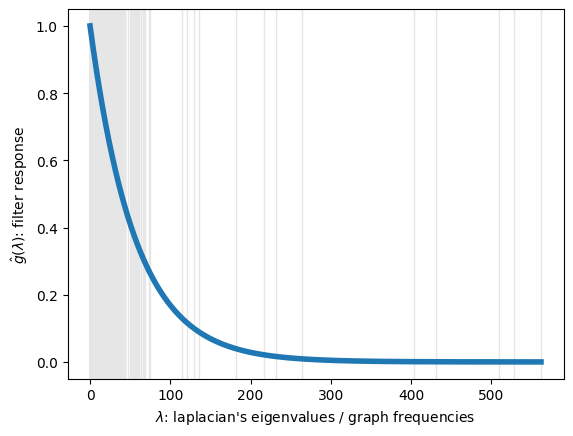

In [15]:
import networkx as nx
import pygsp as pg

G = nx.Graph()
for hyperedge in nlp_model.hypergraph:
    for node in hyperedge:
        for other_node in hyperedge:
            if node != other_node:
                G.add_edge(node, other_node)

# Create a PyGSP graph
G = pg.graphs.Graph(nx.adjacency_matrix(G))

# Compute the wavelets
G.compute_fourier_basis()
wavelets = pg.filters.Heat(G, tau=10)

# Visualize or analyze the wavelets
import matplotlib.pyplot as plt
wavelets.plot()
plt.show()

In [ ]:

rank = 1
world_size = 2


while True:
        nlp_model.spawn(train,
             args=(world_size, dataset, input_dim, hidden_dim),
             nprocs=world_size,
             join=True)
        nlp_model.train(rank, world_size , dataset, input_dim, hidden_dim)
        break


AttributeError: 'NLPModel' object has no attribute 'spawn'

In [ ]:
save

In [22]:
class hyperchat():
  #define chat with nlp hypergraph model
  def __init__(self):
      self.name = "hyperchat"
      self.model = nlp_model
      self.conversation_history = []

      while self.name == "hyperchat":
          user_input = input("You: ")
          if user_input.lower() == "exit":
              break
          for text in user_input:
            text = dataset.text_to_hypergraph(text)
            self.model.respond(text)
            print(self.model.conversation_history)

In [23]:
hyperchat()

You: hi


TypeError: NLPModel.predict_next_statement() takes 1 positional argument but 2 were given

sees stuff

In [ ]:
class VisionTransformer(nn.Module):
    def __init__(self):
        super(VisionTransformer, self).__init__()
        self.vit = torchvision.models.vit_b_16(pretrained=True)

    def forward(self, image):
        return self.vit(image)

cnn rnn combo network

In [ ]:
# Define the MultiCNNRNNCombo class
class MultiCNNRNNCombo(nn.Module):
    def __init__(self):
        super(MultiCNNRNNCombo, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.rnn = nn.LSTM(64, 128, num_layers=2)

    def forward(self, image):
        cnn_output = self.cnn(image)
        rnn_output, _ = self.rnn(cnn_output)
        return rnn_output


py auto gui ambiguous actions

In [ ]:
class KeyboardMouseController(nn.Module):
    def __init__(self):
        super(KeyboardMouseController, self).__init__()
        self.pyautogui = pyautogui

    def forward(self, action):
        self.pyautogui.press(action)

In [ ]:
def text_to_speech(text):
    tts = gtts.gTTS(text)
    tts.save("response.mp3")
    os.system("mpg321 response.mp3")

# Error handling example
try:
        sentences_or_file_folder = texts
        #hypergraph.addnodes(sentences_or_file_folder)
        #ypergraph.addedges(similar_sentences_or_files)
except FileNotFoundError:
    print("Error: File folder not found. Please provide a valid file folder.")

# Training function
def train(rank, world_size, dataset, input_dim, hidden_dim, output_dim):
    torch.distributed.init_process_group("nccl", rank=rank, world_size=world_size)
    torch.cuda.set_device(rank)
    model = NLPModel(input_dim, hidden_dim, output_dim).to(rank)
    ddp_model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[rank])
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(ddp_model.parameters(), lr=0.001)

    for epoch in range(5):  # Dummy epoch count
        for hypergraph in dataloader:
            optimizer.zero_grad()
            outputs = ddp_model(hypergraph)
            target = torch.zeros_like(outputs).to(rank)  # Dummy target
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

        if rank == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

    torch.distributed.destroy_process_group()

# Example usage
input_dim, hidden_dim, output_dim = 10, 20, 10

integrated model

In [ ]:
class MultimodalModel(nn.Module):
    def __init__(self, chat_component, vision_transformer, multi_cnn_rnn_combo, keyboard_mouse_controller):
        super(MultimodalModel, self).__init__()
        self.nlp_model = nlp_model
        self.chat_component = hyperchat
        self.vision_transformer = vision_transformer
        self.multi_cnn_rnn_combo = multi_cnn_rnn_combo
        self.keyboard_mouse_controller = keyboard_mouse_controller
        self.speech_component = text_to_speech
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    def forward(self, user_input, image):
        language_output = self.chat_component(user_input)
        vision_output = self.vision_transformer(image)
        action = self.multi_cnn_rnn_combo(vision_output)
        self.keyboard_mouse_controller(action)
        return language_output, action


text to speech

# Diffusion

sets up image directory

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image
import os
image_dir = 'C:/users/jonny/Documents/ONI/PATH/knowledge_base/picturememory'
os.makedirs(image_dir, exist_ok=True)

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_names = os.listdir(img_dir)

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_names[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64 (or any desired size)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

  # Update this with the path to your folder
dataset = CustomImageDataset(img_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)



sets up diffusion model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

class DDPM(nn.Module):
    def __init__(self, timesteps=1000, beta_start=0.0001, beta_end=0.02):
        super(DDPM, self).__init__()
        self.timesteps = timesteps
        self.betas = torch.linspace(beta_start, beta_end, timesteps)
        self.alphas = 1 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)

    def forward(self, x, t):
        # Forward process: add noise to x at time t
        noise = torch.randn_like(x)
        return (self.alphas_cumprod[t] ** 0.5) * x + (1 - self.alphas_cumprod[t]) ** 0.5 * noise

    def reverse(self, x, t):
        # Reverse process: denoise x at time t (simplified for illustration)
        return x  # In practice, use a neural network to predict the denoised image

    def sample(self, shape):
        x = torch.randn(shape)
        for t in reversed(range(self.timesteps)):
            x = self.reverse(x, t)
        return x

    def params(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)

model = DDPM(dataset)

# Example usage
transform = transforms.Compose([transforms.ToTensor(dataset), transforms.Normalize((0.5,), (0.5,))])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)
model_parameters = list(model.parameters())

#optimizer = optim.Adam(model.parameters(), lr=1e-3)

print(f'Model parameters: {model.params()}')

TypeError: linspace() received an invalid combination of arguments - got (float, float, CustomImageDataset), but expected one of:
 * (Tensor start, Tensor end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Tensor end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Tensor start, Number end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Number start, Number end, int steps, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


optimizes diffuser

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    for batch in dataloader:
        batch = batch.cuda()  # Move data to GPU if available
        t = torch.randint(0, model.timesteps, (batch.size(0),)).cuda()
        noisy_data = model.forward(batch, t)
        optimizer.zero_grad()
        loss = ((noisy_data - batch) ** 2).mean()  # Simplified loss
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}: Loss {loss.item()}')

# Sampling
sampled_images = model.sample((64, 3, 64, 64)).cpu().detach()  # Adjust shape as needed


NameError: name 'model' is not defined

In [ ]:
''' clear '''


# Clear the session
torch.cuda.reset_peak_memory_stats()
torch.cuda.reset_peak_allocations()
torch.cuda.reset_max_memory_allocated()
torch.cuda.reset_max_memory_reserved()
torch.cuda.reset_reserved_memory()


# Free up GPU memory
torch.cuda.empty_cache()

# Delete all variables
#del vocab
#del word_to_index
#del nodes
#del hyperedges
#del hypergraph
#del hyper_vocab
#del dataset
#del hypergraphs
#del node_features
#del adjacency_matrix
#del nlp_model
#del working_data


# Free up GPU memory
#tf.config.experimental.reset_memory_stats(device="GPU:1")

RuntimeError: invalid argument to reset_peak_memory_stats